<a href="https://colab.research.google.com/github/smoreira/secitec/blob/main/secitec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
if len(tf.config.list_physical_devices('GPU')) > 0:
  print("Voce está usando GPU")
else:
  print("Não está usando GPU")

Voce está usando GPU


In [4]:
print(tf.__version__)

2.3.0


In [6]:
!! nvidia-smi

['Fri Dec 11 13:07:19 2020       ',
 '+-----------------------------------------------------------------------------+',
 '| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |',
 '|-------------------------------+----------------------+----------------------+',
 '| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |',
 '| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |',
 '|                               |                      |               MIG M. |',
 '|===============================+======================+======================|',
 '|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |',
 '| N/A   36C    P0    26W / 250W |     10MiB / 16280MiB |      0%      Default |',
 '|                               |                      |                 ERR! |',
 '+-------------------------------+----------------------+----------------------+',
 '                                      

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [9]:
dataset_path_new = "/content/drive/My Drive/datasets/soja"

In [10]:
train_dir = os.path.join(dataset_path_new, "train")
validation_dir = os.path.join(dataset_path_new, "validation")

In [11]:
img_shape = (128, 128, 3)

In [12]:
base_model = tf.keras.applications.MobileNetV2(input_shape = img_shape, 
                                               include_top = False,
                                               weights = "imagenet")

9412608/9406464 [==============================] - 0s 0us/step


In [13]:
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [14]:
base_model.trainable = False

In [15]:
base_model.output

<tf.Tensor 'out_relu/Relu6:0' shape=(None, 4, 4, 1280) dtype=float32>

In [16]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

In [17]:
prediction_layer = tf.keras.layers.Dense(units = 10, activation = "softmax")(global_average_layer)

In [18]:
model = tf.keras.models.Model(inputs = base_model.input, outputs = prediction_layer)

In [19]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________________

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="categorical_crossentropy", 
              metrics = ["accuracy"])

In [21]:
image_size = 128
batch_size = 32

In [22]:
data_gen_train = ImageDataGenerator(rescale=1/255.)
data_gen_valid = ImageDataGenerator(rescale=1/255.)

In [23]:
train_generator = data_gen_train.flow_from_directory(train_dir, target_size=(image_size,image_size), batch_size=batch_size, class_mode="categorical")
validation_generator = data_gen_train.flow_from_directory(validation_dir, target_size=(image_size,image_size), batch_size=batch_size, class_mode="categorical")

Found 259 images belonging to 10 classes.
Found 58 images belonging to 10 classes.


In [24]:
epochs = 25
steps_per_epoch = np.ceil(train_generator.n / batch_size)
validation_steps = np.ceil(validation_generator.n / batch_size)

In [25]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
4/9 [============>.................] - ETA: 1:02 - loss: 2.6735 - accuracy: 0.1717

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


9/9 [==============================] - 201s 22s/step - loss: 2.2793 - accuracy: 0.2548 - val_loss: 1.8588 - val_accuracy: 0.2759
Epoch 2/25
9/9 [==============================] - 1s 101ms/step - loss: 1.3404 - accuracy: 0.5521 - val_loss: 1.3906 - val_accuracy: 0.4138
Epoch 3/25
9/9 [==============================] - 1s 91ms/step - loss: 0.8325 - accuracy: 0.7761 - val_loss: 1.0608 - val_accuracy: 0.6207
Epoch 4/25
9/9 [==============================] - 1s 93ms/step - loss: 0.5627 - accuracy: 0.8649 - val_loss: 0.9273 - val_accuracy: 0.6724
Epoch 5/25
9/9 [==============================] - 1s 88ms/step - loss: 0.4102 - accuracy: 0.9151 - val_loss: 0.8535 - val_accuracy: 0.6724
Epoch 6/25
9/9 [==============================] - 1s 94ms/step - loss: 0.3064 - accuracy: 0.9691 - val_loss: 0.8028 - val_accuracy: 0.7241
Epoch 7/25
9/9 [==============================] - 1s 94ms/step - loss: 0.2337 - accuracy: 0.9846 - val_loss: 0.7572 - val_accuracy: 0.7931
Epoch 8/25
9/9 [====================

In [28]:
valid_loss, valid_accuracy = model.evaluate_generator(validation_generator,steps=60)


In [29]:
valid_accuracy

0.8103448152542114

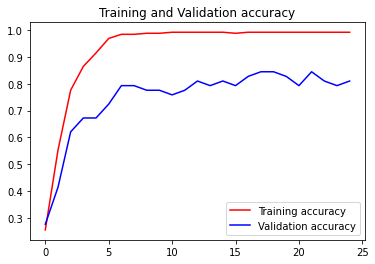

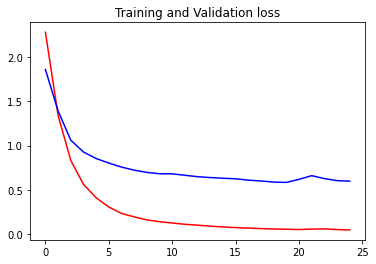

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot  ( epochs,     loss, 'r', label='Training Loss')
plt.plot  ( epochs, val_loss, 'b', label='Validation Loss')
plt.title ('Training and Validation loss')

plt.show()